In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Barra de progreso de un proceso
# ------------------------------------------------------------------------------
from tqdm import tqdm

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [2]:
df=pd.read_csv('datos/bikes_preparado.csv', index_col=0)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_BOX
0,1,-1.0,-0.617143,4.636809,-1.460318,-4.636809,1.112473,0.454618,0.677080,1.484801,-0.628344,-0.014021,-1.348671,18.047507
1,1,-1.0,-0.617143,-0.215666,-0.965295,0.215666,1.112473,0.642695,0.577171,0.757869,0.391271,-0.530643,-1.335334,16.952659
2,1,-1.0,-0.617143,-0.215666,-0.470272,0.215666,-0.758977,-0.984891,-1.083596,-0.956453,0.388609,-0.559057,-0.869379,19.822839
3,1,-1.0,-0.617143,-0.215666,0.024751,0.215666,-0.758977,-0.949479,-0.854017,0.058056,-0.630080,-0.590054,-0.681830,20.698484
4,1,-1.0,-0.617143,-0.215666,0.519774,0.215666,-0.758977,-0.686934,-0.680718,-0.958546,-0.322158,-0.657215,-0.628483,20.845083


In [3]:

X = df.drop("cnt_BOX", axis = 1)
y = df["cnt_BOX"]


In [4]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:

param = {"max_depth": [2,4, 6], 
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [6]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), 
            param_grid= param,
            cv=10, 
            verbose=-1,
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

In [7]:

gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [8]:

bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=6, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

In [9]:
# Árboles

#for arbol in tqdm(bosque.estimators_):
    #fig = plt.figure(figsize=(40, 20))
    #tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
    #plt.show()

In [10]:

y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [11]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [12]:

dt_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.992781,2.149245,1.466030,0.835719,test,Random Forest
1,0.810112,1.621945,1.273556,0.885497,train,Random Forest


In [13]:

dt_results.to_csv('datos/bikes_RF.csv')

In [14]:

df_DT_results = pd.read_csv("datos/bikes_DT.csv", index_col = 0)
df_DT_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.529329,0.620632,0.787802,0.952561,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,1.047885,2.004568,1.415828,0.846777,test,Decision tree II
1,0.964701,1.757613,1.325750,0.875919,train,Decision tree II


In [15]:

df_todos_resultados = pd.concat([dt_results, df_DT_results], axis = 0)
df_todos_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.992781,2.149245,1.466030,0.835719,test,Random Forest
1,0.810112,1.621945,1.273556,0.885497,train,Random Forest
0,0.529329,0.620632,0.787802,0.952561,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,1.047885,2.004568,1.415828,0.846777,test,Decision tree II
1,0.964701,1.757613,1.325750,0.875919,train,Decision tree II


> - El mejor modelo es el DecisionTreeII

In [20]:
df_todos_resultados.to_csv('datos/bikes_DT_RF.csv')

In [21]:

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )



importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)


print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
12,registered,0.429717
1,year,0.228319
11,casual,0.107348
8,atemp,0.089538
7,temp,0.083510
9,hum,0.021779
2,month,0.016477
4,weekday,0.011796
10,windspeed,0.009320
6,weathersit,0.002195


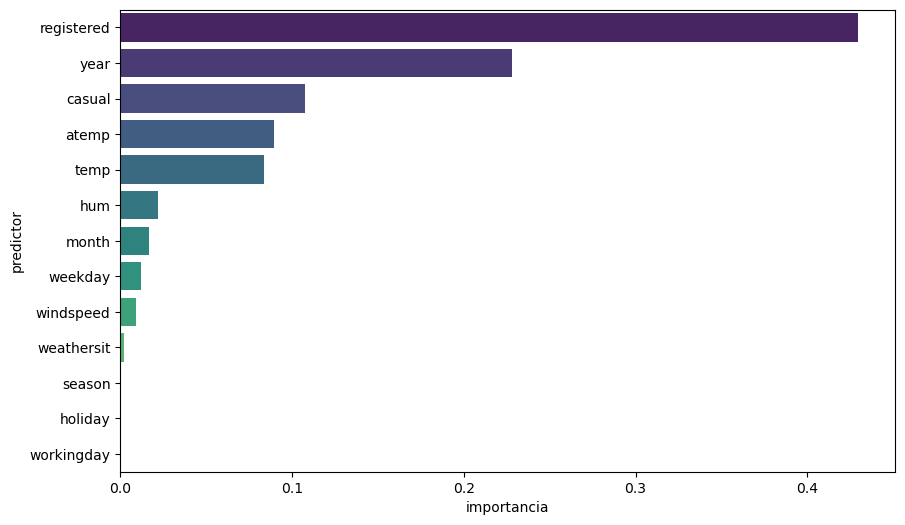

In [22]:

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()